In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
train = pd.read_csv('Data_training.csv', header=0)
test = pd.read_csv('Data_testing.csv', header=0)

In [92]:
print("Training shape:")
print(train.shape)
print("\n Training shape:")
print(test.shape)

Training shape:
(31188, 21)

 Training shape:
(10000, 20)


In [93]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,31188.000000,31188.000000,31188.000000,31188.000000,31188.000000,31188.000000,31188.000000,31188.000000,31188.000000,31188.00000
mean,39.974990,257.557650,2.535046,950.764364,0.228421,-0.269530,93.402326,-41.368562,3.220285,5156.26406
std,10.874895,262.397636,2.722974,213.477822,0.557489,1.656815,0.552322,4.837627,1.819390,79.57002
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.60000
25%,32.000000,100.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.291000,5099.10000
50%,38.000000,176.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-42.000000,4.120000,5195.80000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.918000,-36.100000,4.962000,5228.10000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.10000


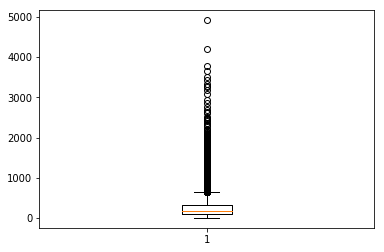

In [95]:
plt.boxplot(train['duration'])
plt.show()

In [98]:
train[['age', 'duration']].sort_values(by='duration', ascending=False)

,age,duration
14091,33,4918
12192,52,4199
30537,27,3785
3820,31,3643
26043,28,3509
9632,47,3422
10996,47,3322
14043,27,3284
14004,46,3253
2029,58,3183


In [99]:
test.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,40.177100,260.553500,2.669100,999.0,0.0,1.177880,94.116272,-37.80184,4.871949,5200.631160
std,8.857199,249.302378,2.909648,0.0,0.0,0.131531,0.206504,2.36756,0.034591,16.266015
min,20.000000,0.000000,1.000000,999.0,0.0,1.100000,93.994000,-41.80000,4.855000,5191.000000
25%,33.000000,111.000000,1.000000,999.0,0.0,1.100000,93.994000,-41.80000,4.857000,5191.000000
50%,39.000000,188.000000,2.000000,999.0,0.0,1.100000,93.994000,-36.40000,4.858000,5191.000000
75%,47.000000,320.000000,3.000000,999.0,0.0,1.400000,94.465000,-36.40000,4.864000,5228.100000
max,61.000000,3631.000000,56.000000,999.0,0.0,1.400000,94.465000,-36.40000,4.967000,5228.100000


In [100]:
train_no_dup = train.drop_duplicates()

In [102]:
train_no_dup.shape

(31177, 21)

In [103]:
train_no_dup = train_no_dup[train_no_dup.duration != 4199]

In [104]:
train_no_dup = train_no_dup[train_no_dup.duration != 4918]

In [105]:
train_no_dup = train_no_dup.drop(['job', 'education', 'pdays'], axis=1)

In [139]:
test_no_dup = test.drop(['job', 'education', 'pdays'], axis=1)

In [109]:
train_no_dup.shape

(31175, 18)

In [110]:
train_no_dup = train_no_dup.drop_duplicates()

In [114]:
train_no_dup.shape

(31160, 18)

In [115]:
train_copy = train_no_dup.copy()


In [140]:
test_copy = test_no_dup.copy()

In [141]:
test_copy.head()

,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,58,married,no,yes,no,telephone,may,mon,350,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,40,divorced,unknown,no,no,telephone,may,tue,88,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,57,married,no,yes,no,telephone,may,tue,379,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,45,married,no,yes,no,telephone,may,tue,168,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,42,married,unknown,yes,no,telephone,may,tue,190,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [117]:
test_copy.head()

,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,58,married,no,yes,no,telephone,may,mon,350,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,40,divorced,unknown,no,no,telephone,may,tue,88,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,57,married,no,yes,no,telephone,may,tue,379,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,45,married,no,yes,no,telephone,may,tue,168,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,42,married,unknown,yes,no,telephone,may,tue,190,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


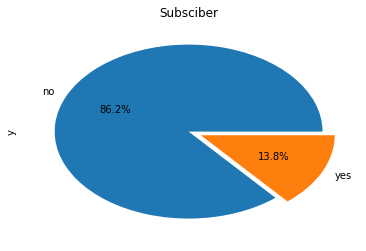

In [118]:
train_copy['y'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.title('Subsciber')
plt.show()

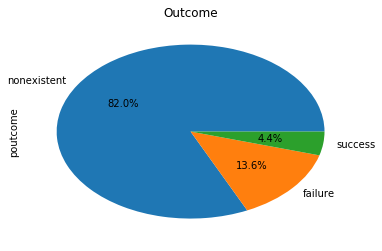

In [119]:
train_copy['poutcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Outcome')
plt.show()

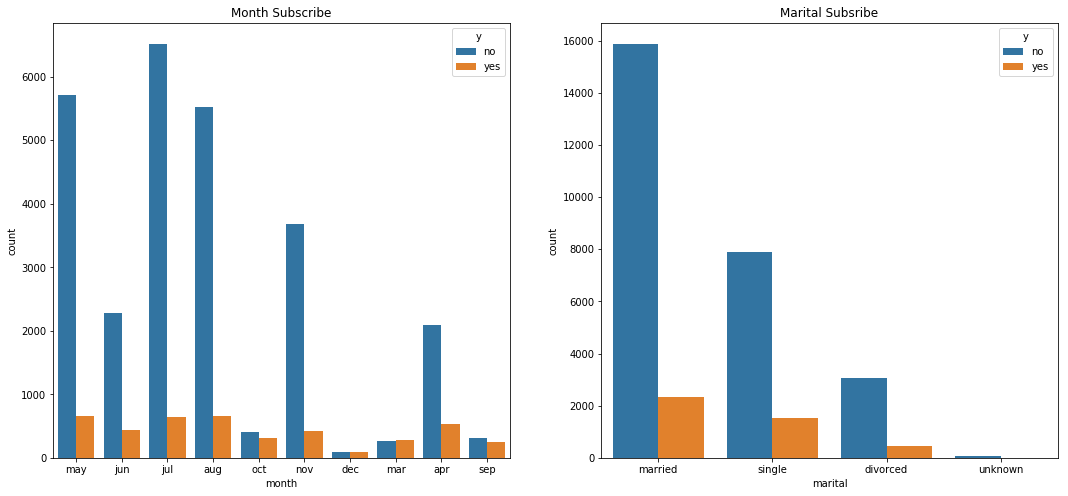

In [59]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('month', hue='y', data=train_copy, ax=ax[0])
ax[0].set_title("Month Subscribe")
sns.countplot('marital', hue='y', data=train_copy, ax=ax[1])
ax[1].set_title('Marital Subsribe')
plt.show()

In [30]:
pd.crosstab(train_copy.marital, train_copy.y, margins=True).style.background_gradient(cmap='summer_r')

y,no,yes,All
marital,,,
divorced,3052,438,3490
married,15884,2320,18204
single,7880,1522,9402
unknown,53,11,64
All,26869,4291,31160


/home/fairuz/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


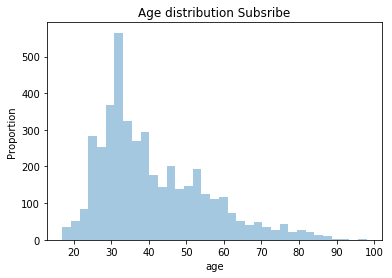

In [13]:
subscribe_ages = train_copy[train_copy.y == 'yes']["age"]
sns.distplot(subscribe_ages, kde=False)
plt.title('Age distribution Subsribe')
plt.ylabel('Proportion')
plt.show()

/home/fairuz/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


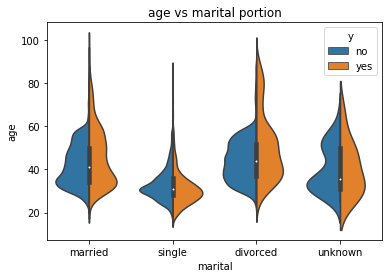

In [32]:
sns.violinplot('marital', 'age', hue='y', data=train_copy, split=True)
plt.title('age vs marital portion')
plt.show()

In [120]:
train_copy['default'] = train_copy.default.map({'no':0, 'yes':1, 'unknown':2})
train_copy['housing'] = train_copy.housing.map({'no':0, 'yes':1, 'unknown':2})
train_copy['loan'] = train_copy.loan.map({'no':0, 'yes':1, 'unknown':2})
train_copy['poutcome'] = train_copy.poutcome.map({'failure':0, 'nonexistent':1, 'success':2})
train_copy['day_of_week'] = train_copy.day_of_week.map({'mon':0,'tue':1,'wed':2,'thu':3,'fri':4})
train_copy['month'] = train_copy.month.map({'may':0, 'jun':1, 'jul':2, 'aug':3, 'oct':4, 'nov':5, 'dec':6, 'mar':7, 'apr':8,
       'sep':9})
train_copy['marital'] = train_copy.marital.map({'divorced':0, 'married':1, 'single':2,'unknown':3})
train_copy['contact'] = train_copy.contact.map({'telephone':0, 'cellular':1})

In [142]:
test_copy['default'] = test_copy.default.map({'no':0, 'yes':1, 'unknown':2})
test_copy['housing'] = test_copy.housing.map({'no':0, 'yes':1, 'unknown':2})
test_copy['loan'] = test_copy.loan.map({'no':0, 'yes':1, 'unknown':2})
test_copy['poutcome'] = test_copy.poutcome.map({'failure':0, 'nonexistent':1, 'success':2})
test_copy['day_of_week'] = test_copy.day_of_week.map({'mon':0,'tue':1,'wed':2,'thu':3,'fri':4})
test_copy['month'] = test_copy.month.map({'may':0, 'jun':1, 'jul':2, 'aug':3, 'oct':4, 'nov':5, 'dec':6, 'mar':7, 'apr':8,
       'sep':9})
test_copy['marital'] = test_copy.marital.map({'divorced':0, 'married':1, 'single':2,'unknown':3})
test_copy['contact'] = test_copy.contact.map({'telephone':0, 'cellular':1})

In [122]:
train_copy.head()

,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,0,0,0,0,0,0,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,1,2,0,0,0,0,0,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,1,0,1,0,0,0,0,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,0,0,0,0,0,0,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,1,0,0,1,0,0,0,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [143]:
test_copy.head()

,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,58,1,0,1,0,0,0,0,350,2,0,1,1.1,93.994,-36.4,4.857,5191.0
1,40,0,2,0,0,0,0,1,88,3,0,1,1.1,93.994,-36.4,4.857,5191.0
2,57,1,0,1,0,0,0,1,379,2,0,1,1.1,93.994,-36.4,4.857,5191.0
3,45,1,0,1,0,0,0,1,168,3,0,1,1.1,93.994,-36.4,4.857,5191.0
4,42,1,2,1,0,0,0,1,190,3,0,1,1.1,93.994,-36.4,4.857,5191.0


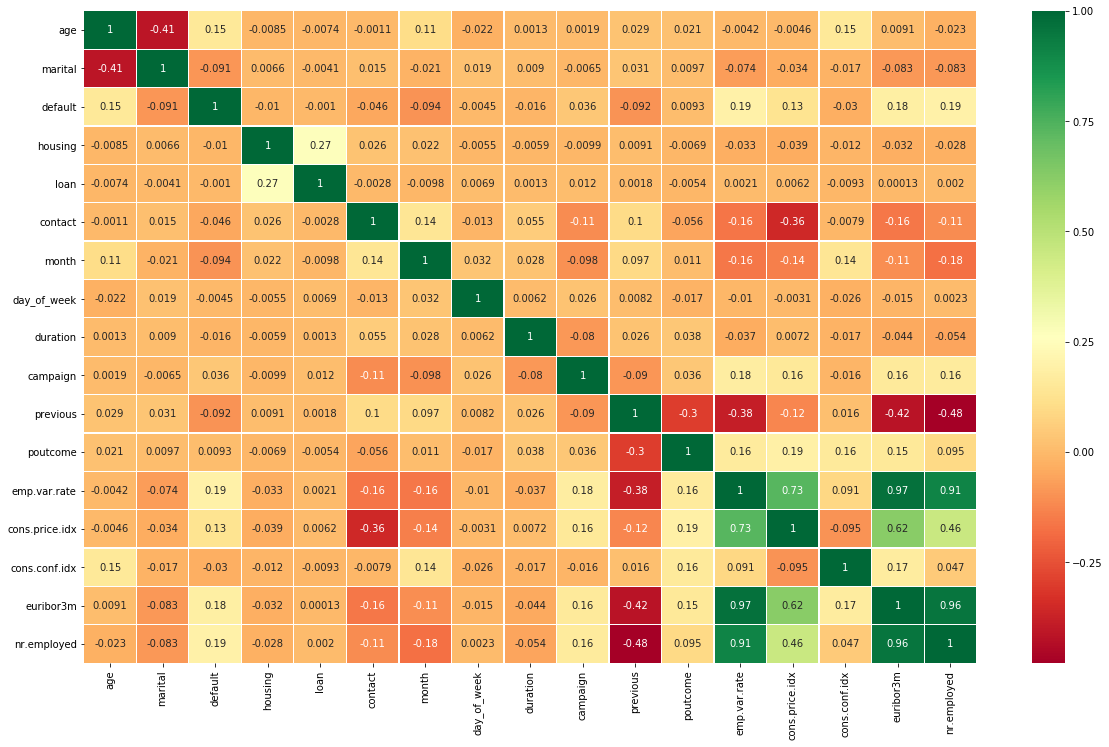

In [124]:
sns.heatmap(train_copy.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

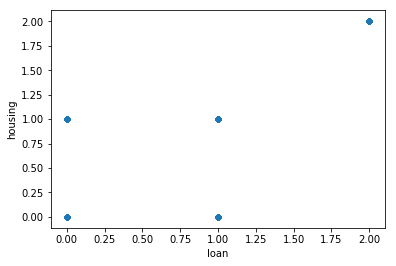

In [38]:
train_copy.plot(kind='scatter', x='loan', y='housing')
plt.show()

In [125]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
Targeted_feature = train_copy['y'].values
all_features = train_copy.drop('y', axis=1).values

# Split into training and test set
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21812, 17), (9348, 17), (21812,), (9348,))

--------------The Accuracy of the model----------------------------
('The accuracy of the Logistic Regression is', 89.25)
('The cross validated score for Logistic REgression is:', 79.63)


Text(0.5,1.05,'Confusion_matrix')

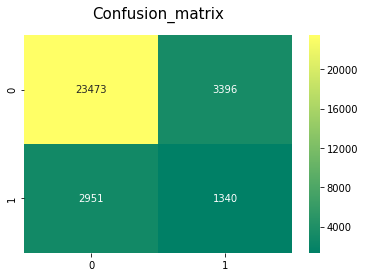

In [135]:
from sklearn.linear_model import LogisticRegression # Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
prediction_lr=lr_model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(lr_model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(lr_model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [149]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

--------------The Accuracy of the model----------------------------
('The accuracy of the Support Vector Machines Classifier is', 86.21)
('The cross validated score for Support Vector Machines Classifier is:', 81.68)


Text(0.5,1.05,'Confusion_matrix')

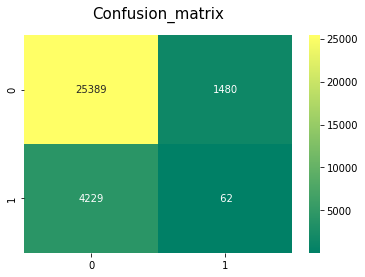

In [136]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC

svc_model = SVC()
svc_model.fit(X_train,y_train)
prediction_svm=svc_model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(svc_model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(svc_model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [138]:
svc_model.fit(all_features, Targeted_feature)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [144]:
submission_predictions = svc_model.predict(test_copy)

In [146]:
test['y'] = submission_predictions

test.to_csv('test.csv', index=False)

In [ ]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = [‘red’ if c < 0 else ‘blue’ for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha=’right’)
 plt.show()

In [148]:
model = SVC()
model.fit(all_features,Targeted_feature)
pd.Series(model.feature_importances_,all_features.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance in SVM')
plt.show()

AttributeError: 'SVC' object has no attribute 'feature_importances_'

--------------The Accuracy of the model----------------------------
('The accuracy of the K Nearst Neighbors Classifier is', 87.47)
('The cross validated score for K Nearest Neighbors Classifier is:', 75.31)


Text(0.5,1.05,'Confusion_matrix')

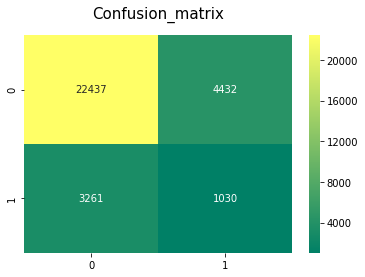

In [127]:
##knn
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
('The accuracy of the Gaussian Naive Bayes Classifier is', 80.85)
('The cross validated score for Gaussian Naive Bayes classifier is:', 74.45)


Text(0.5,1.05,'Confusion_matrix')

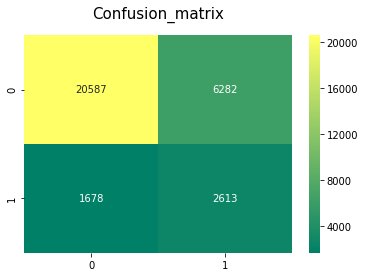

In [128]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
('The accuracy of the LinearDiscriminantAnalysis is', 88.92)
('The cross validated score for AdaBoostClassifier is:', 76.22)


Text(0.5,1.05,'Confusion_matrix')

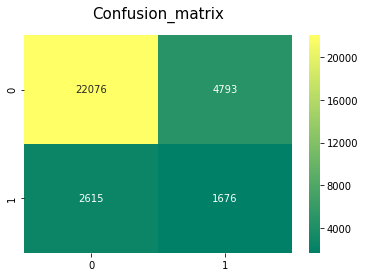

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the LinearDiscriminantAnalysis is',round(accuracy_score(prediction_lda,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lda=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_lda.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
('The accuracy of the AdaBoostClassifier is', 89.2)
('The cross validated score for AdaBoostClassifier is:', 71.91)


Text(0.5,1.05,'Confusion_matrix')

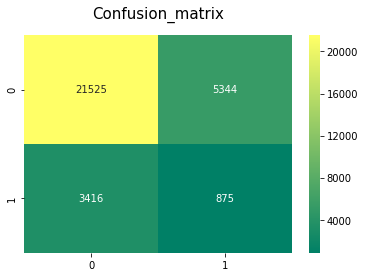

In [132]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(prediction_adb,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_adb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [134]:
models = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'Logistic Regression', 
            'Naive Bayes', 'AdaBoostClassifier', 
            'Linear Discriminant Analysis', 
              ],
    'Score': [result_svm.mean(), result_knn.mean(), result_lr.mean(), 
              result_gnb.mean(), result_adb.mean(), 
              result_lda.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,SVM,0.816779
2,Logistic Regression,0.796288
5,Linear Discriminant Analysis,0.762235
1,KNN,0.753091
3,Naive Bayes,0.744522
4,AdaBoostClassifier,0.719138


In [ ]:
rf_clf.fit(X_train, y_train)